## Chi-Square Goodness-of-Fit Test

### Objective
Apply the chi-square goodness-of-fit test to determine if a sample distribution matches a hypothesized population distribution. We will be calculating the expected frequencies, the chi-square test statistic, and the p-value, and then draw a conclusion.
***

#### M&M's Color Distribution 🍫
A bag of M&M's claims to have the following color distribution (**Expectation**):
* Brown: 30%
* Yellow: 20%
* Red: 20%
* Blue: 10%
* Orange: 10%
* Green: 10%

On opening a large bag of M&M's here are the **observations**.
* Brown: 150
* Yellow: 95
* Red: 110
* Blue: 48
* Orange: 52
* Green: 45


**The Hypotheses:** 

**$H_0$**: The Null hypothesis states that there's no difference between the observed and expected data. It clains that the proportions of M&M's colors in the bag are exactly as the company states.
- Brown: 30%
- Yellow: 20%
- Red: 20%
- Blue: 10%
- Orange: 10%
- Green: 10%

**$H_a$**: At least one of the M&M's color proportions is different from the values stated in the null hypothesis.



In [29]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import chisquare
alpha = 0.05

In [ ]:
colors = ["Brown", "Yellow", "Red", "Blue", "Orange", "Green"]
expected = pd.Series([0.30, 0.20, 0.20, 0.10, 0.10, 0.10], index=colors)
observed = pd.Series([150, 95, 110, 48, 52, 45], index=colors)
n_obs = observed.sum()
#Based on the company's claimed proportions, we can calculate the expected counts for each color. 
expected = expected * n_obs  # Scale expected counts to match observed total
# Create a DataFrame with expected and observed counts for colors
df = pd.DataFrame({"Expected": expected, "Observed": observed}, index=colors)
df.head(len(colors))

,Expected,Observed
Brown,150.0,150
Yellow,100.0,95
Red,100.0,110
Blue,50.0,48
Orange,50.0,52
Green,50.0,45


### Calculating Expected and Observed Counts
We calculate the expected counts for each M&M's color based on the company's claimed proportions and the total number of candies observed. These expected counts are then compared to the actual observed counts from the sample. The results are organized into a DataFrame for further analysis and visualization.

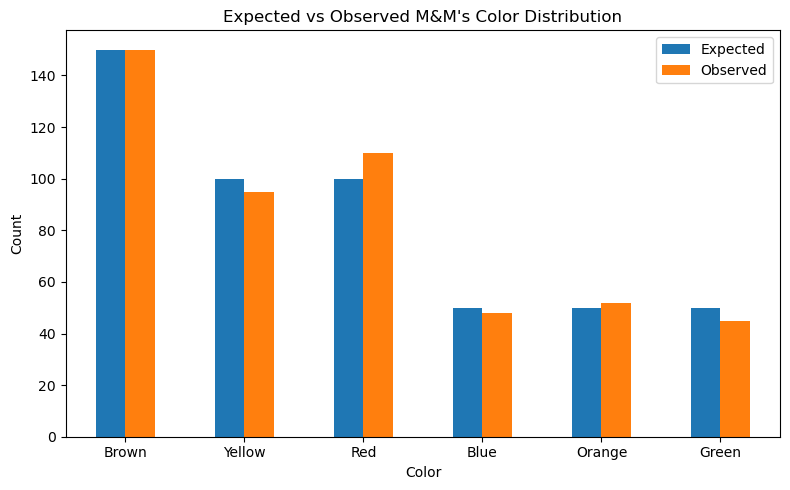

In [24]:
df.plot(kind='bar', figsize=(8, 5))
plt.title("Expected vs Observed M&M's Color Distribution")
plt.xlabel("Color")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(["Expected", "Observed"])
plt.tight_layout()
plt.show()

### Computing the Chi-Square Statistic and p-value
In this step, we use the chi-square goodness-of-fit test to compare the observed and expected counts for each M&M's color. The test calculates the chi-square statistic and the corresponding p-value, which will help us determine whether the observed distribution significantly differs from the expected distribution.

In [ ]:
#Compute the Chi-Square Statistic and P-value.
result = chisquare(f_obs=df['Observed'], f_exp=df['Expected'])
chi_squared_stat = round(result.statistic, 4)
p_value = round(result.pvalue, 4)   
print("Chi-squared Statistic:", chi_squared_stat)
print("P-value:", p_value)

Chi-squared Statistic: 1.91
P-value: 0.8615


In [32]:
if(p_value < alpha):
    print("Reject the null hypothesis")
else:
    print("Since p-value:", p_value, "is greater than alpha:", alpha, "we fail to reject the null hypothesis. This means there is not enough statistical evidence to conclude that the observed distribution of M&M's colors is significantly different from the company's claimed proportions. The small differences observed are likely due to random chance.")

Since p-value: 0.8615 is greater than alpha: 0.05 we fail to reject the null hypothesis. This means there is not enough statistical evidence to conclude that the observed distribution of M&M's colors is significantly different from the company's claimed proportions. The small differences observed are likely due to random chance.


### Conclusion
Based on the comparison of the p-value with the significance level (alpha = 0.05), we determine whether to reject or fail to reject the null hypothesis. If the p-value is less than alpha, there is sufficient evidence to conclude that the observed color distribution of M&M's is significantly different from the company's claimed proportions. If the p-value is greater than or equal to alpha, we fail to reject the null hypothesis, indicating that any differences are likely due to random chance and the observed distribution matches the expected proportions.